<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
data = pd.read_csv('asset_price_data.csv')
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [3]:
df.columns = [column.lower() for column in df.columns] #converting columns to lower case

In [4]:
df.eq(" ").sum() #no empty strings

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [5]:
df.duplicated().sum() #no duplications

0

In [6]:
df.isnull().sum() # many NAN values

date       0
asset1    13
asset2    13
asset3    13
asset4    49
asset5    20
dtype: int64

In [7]:
df_clean = df.fillna(method='ffill')# forward fill of NAN values. If the price didn't change, then the price of the day before is still valid

In [8]:
df_clean.isnull().sum() #no null values anymore

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [9]:
df = df_clean
df["date"] = pd.to_datetime(df.date) #making the date string object a datetime object.
df.dtypes

date      datetime64[ns]
asset1           float64
asset2           float64
asset3           float64
asset4           float64
asset5           float64
dtype: object

In [10]:
df = df.set_index('date') #making the date the index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset1  783 non-null    float64
 1   asset2  783 non-null    float64
 2   asset3  783 non-null    float64
 3   asset4  783 non-null    float64
 4   asset5  783 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB


#### Interpretation of EDA of asset price

The data is pretty clean except for a few null values. We inserted the value of the previous day as the price had not changed that day.

# Visualising the current data

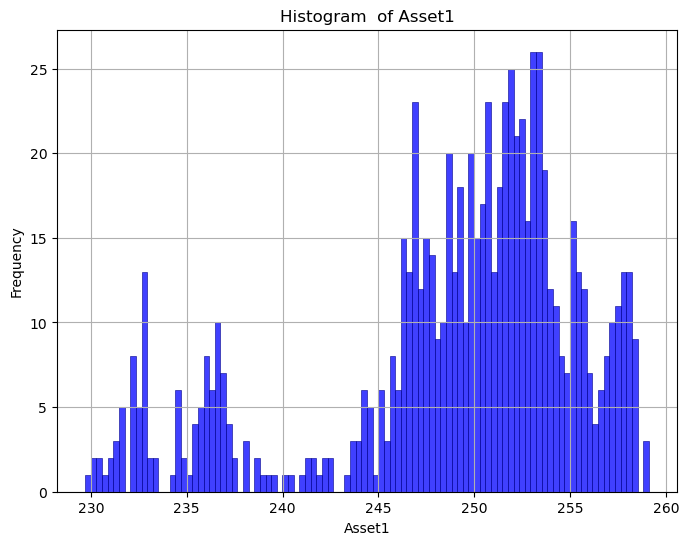

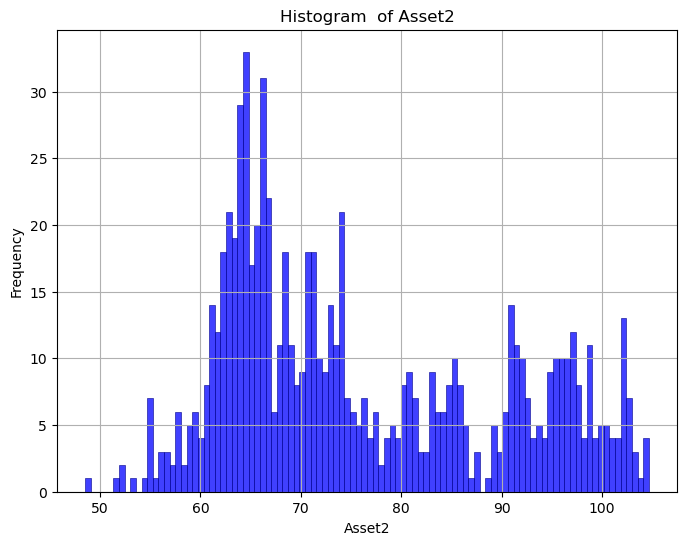

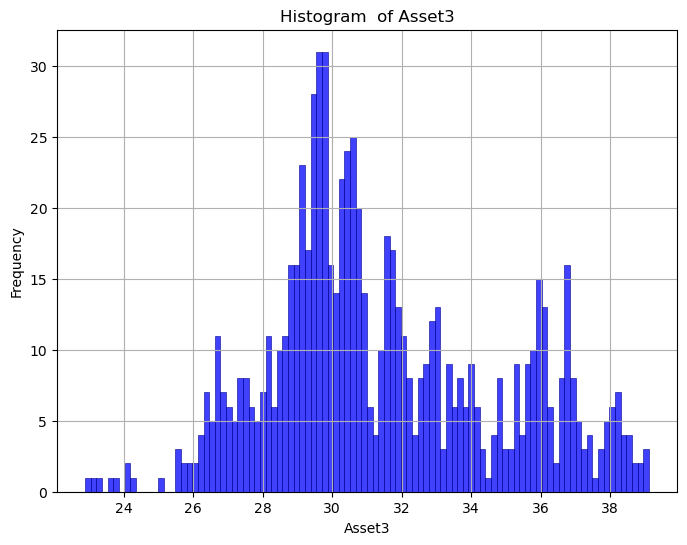

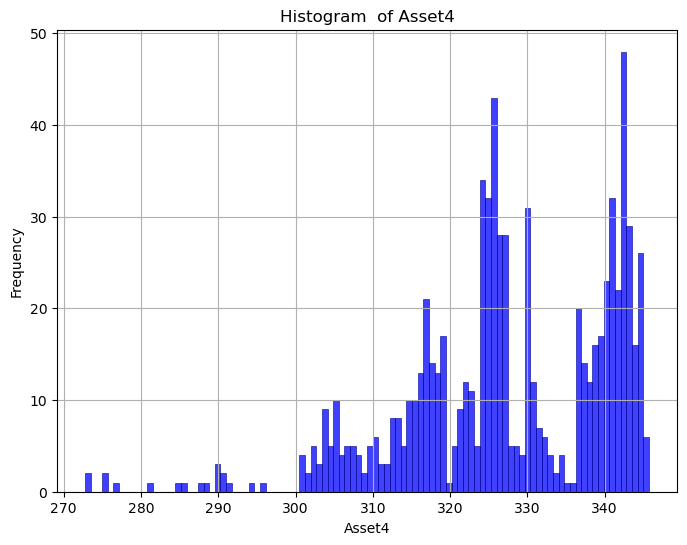

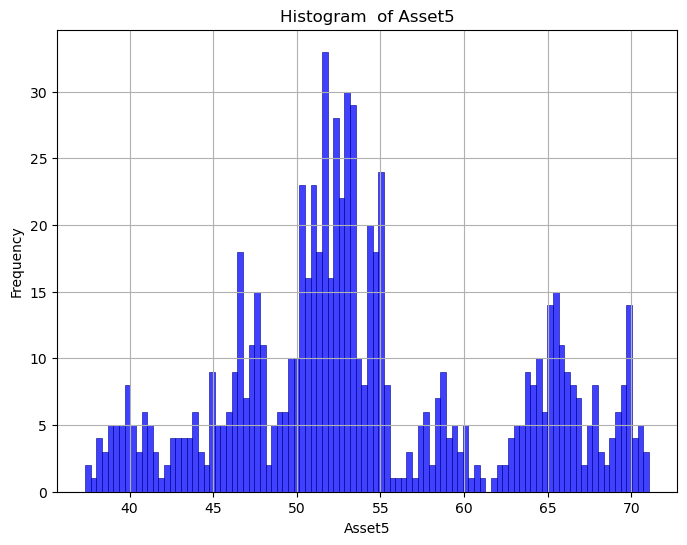

In [11]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=100, color='blue', edgecolor='darkblue')
    plt.title(f'Histogram  of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)  
    plt.show()

#### Interpretation of Histogram per Asset Price

The Histogram shows how often a low or high price appeared within the price range of each asset, but we don't know at what point in time.

# Area Chart of Asset Weights Over Time

<Figure size 1000x1500 with 0 Axes>

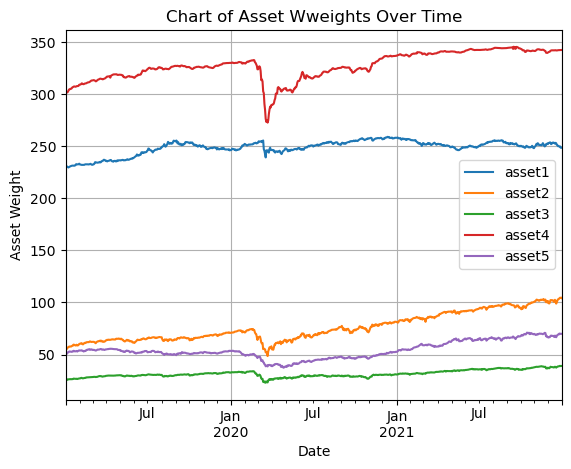

In [12]:
plt.figure(figsize=(10, 15))
df.plot()
plt.title('Chart of Asset Wweights Over Time')
plt.xlabel('Date')
plt.ylabel('Asset Weight')
plt.grid(True)

#### Interpretation of Asset Value over Time

The lineplot shows that each asset grew over time during the three years although all three assets experienced a dip in spring 2020 during covid. Asset 4 experienced the largest dip.

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [13]:
# Calculate daily percentage returns for each asset
returns = df.pct_change()
returns

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
...,...,...,...,...,...
2021-12-27,-0.000913,0.007384,0.005439,0.000000,0.013443
2021-12-28,0.000064,0.005483,0.007599,0.000000,-0.001141
2021-12-29,-0.004862,-0.001588,-0.006647,0.000175,-0.003142


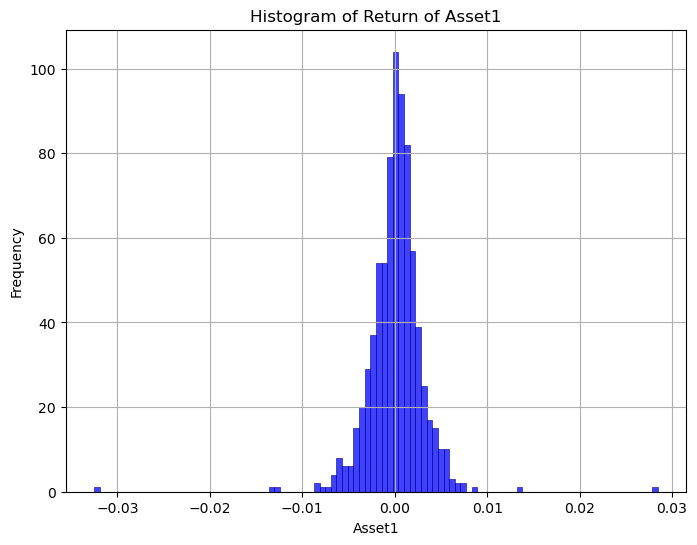

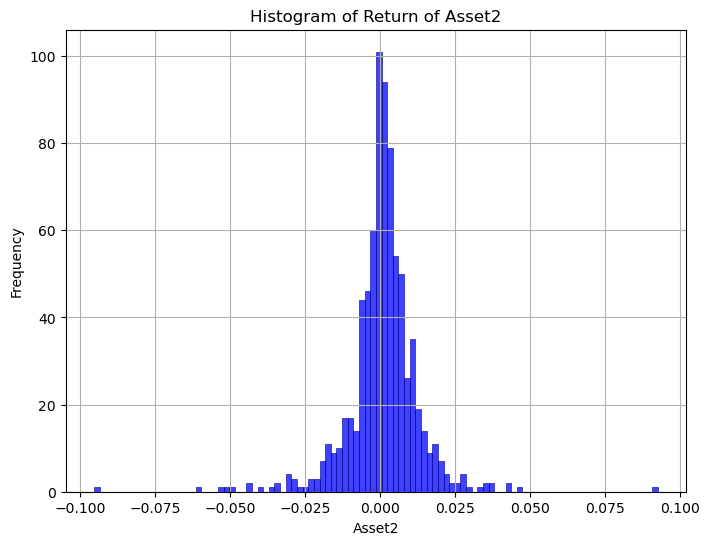

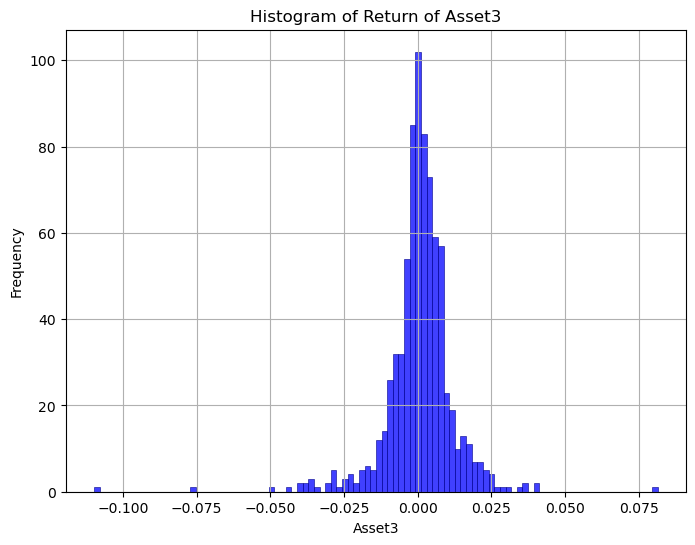

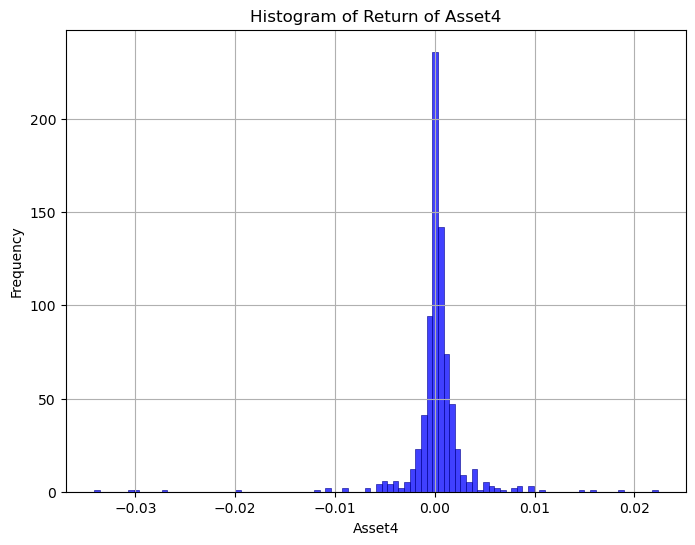

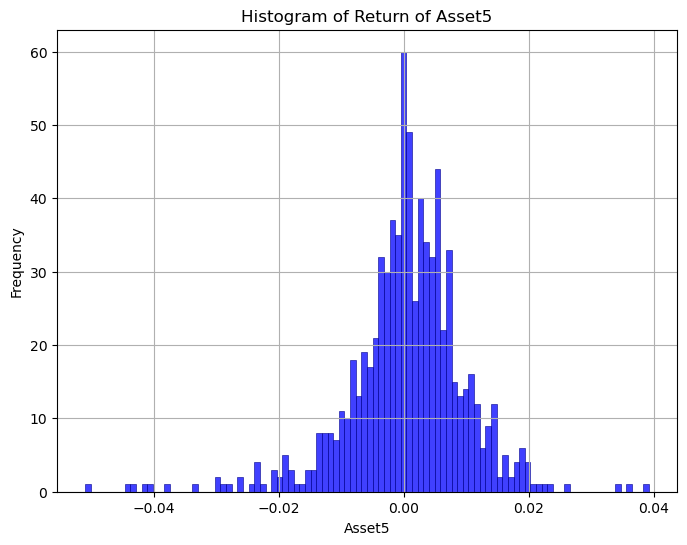

In [14]:
for col in returns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(returns[col], bins=100, color='blue', edgecolor='darkblue')
    plt.title(f'Histogram of Return of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True) 
    plt.show()

#### Interpretation of Returns Distribution

The distribution of the returns look somewhat closely normally distributed with 0 being the main mean.

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

# Asset Correlation

In [15]:
df.corr() # this is checking the pearson correlations which is checking for linearity

,asset1,asset2,asset3,asset4,asset5
asset1,1.000000,0.506719,0.369571,0.563785,0.071127
asset2,0.506719,1.000000,0.906099,0.877494,0.830147
asset3,0.369571,0.906099,1.000000,0.877432,0.869988
asset4,0.563785,0.877494,0.877432,1.000000,0.783916
asset5,0.071127,0.830147,0.869988,0.783916,1.000000


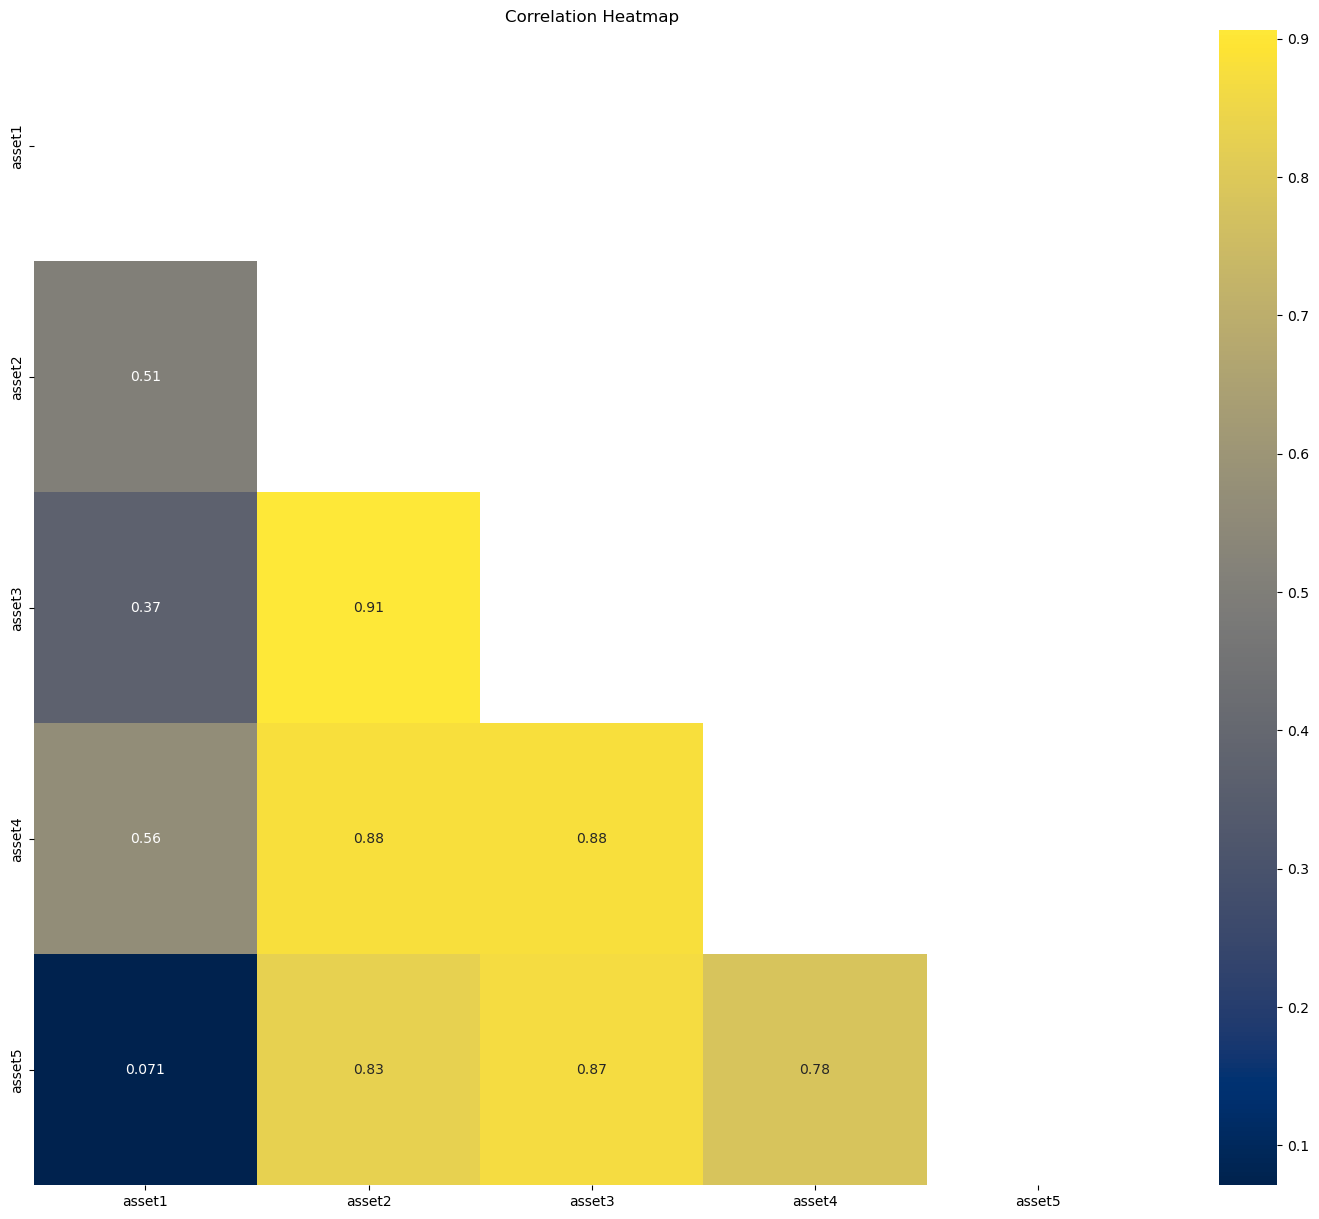

In [16]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(df.corr(), annot=True, cmap="cividis", mask=mask)

plt.title("Correlation Heatmap")
plt.show()

#### Interpretation of Asset Correlation

Except for with asset1, all other assets have a stronger correlation towards each other, both monotonic and linear in the same way.

# Returns Correlation

In [17]:
returns.corr(method='pearson')

,asset1,asset2,asset3,asset4,asset5
asset1,1.000000,-0.088341,-0.061253,0.102252,-0.106484
asset2,-0.088341,1.000000,0.852491,0.526634,0.591399
asset3,-0.061253,0.852491,1.000000,0.511550,0.557414
asset4,0.102252,0.526634,0.511550,1.000000,0.421155
asset5,-0.106484,0.591399,0.557414,0.421155,1.000000


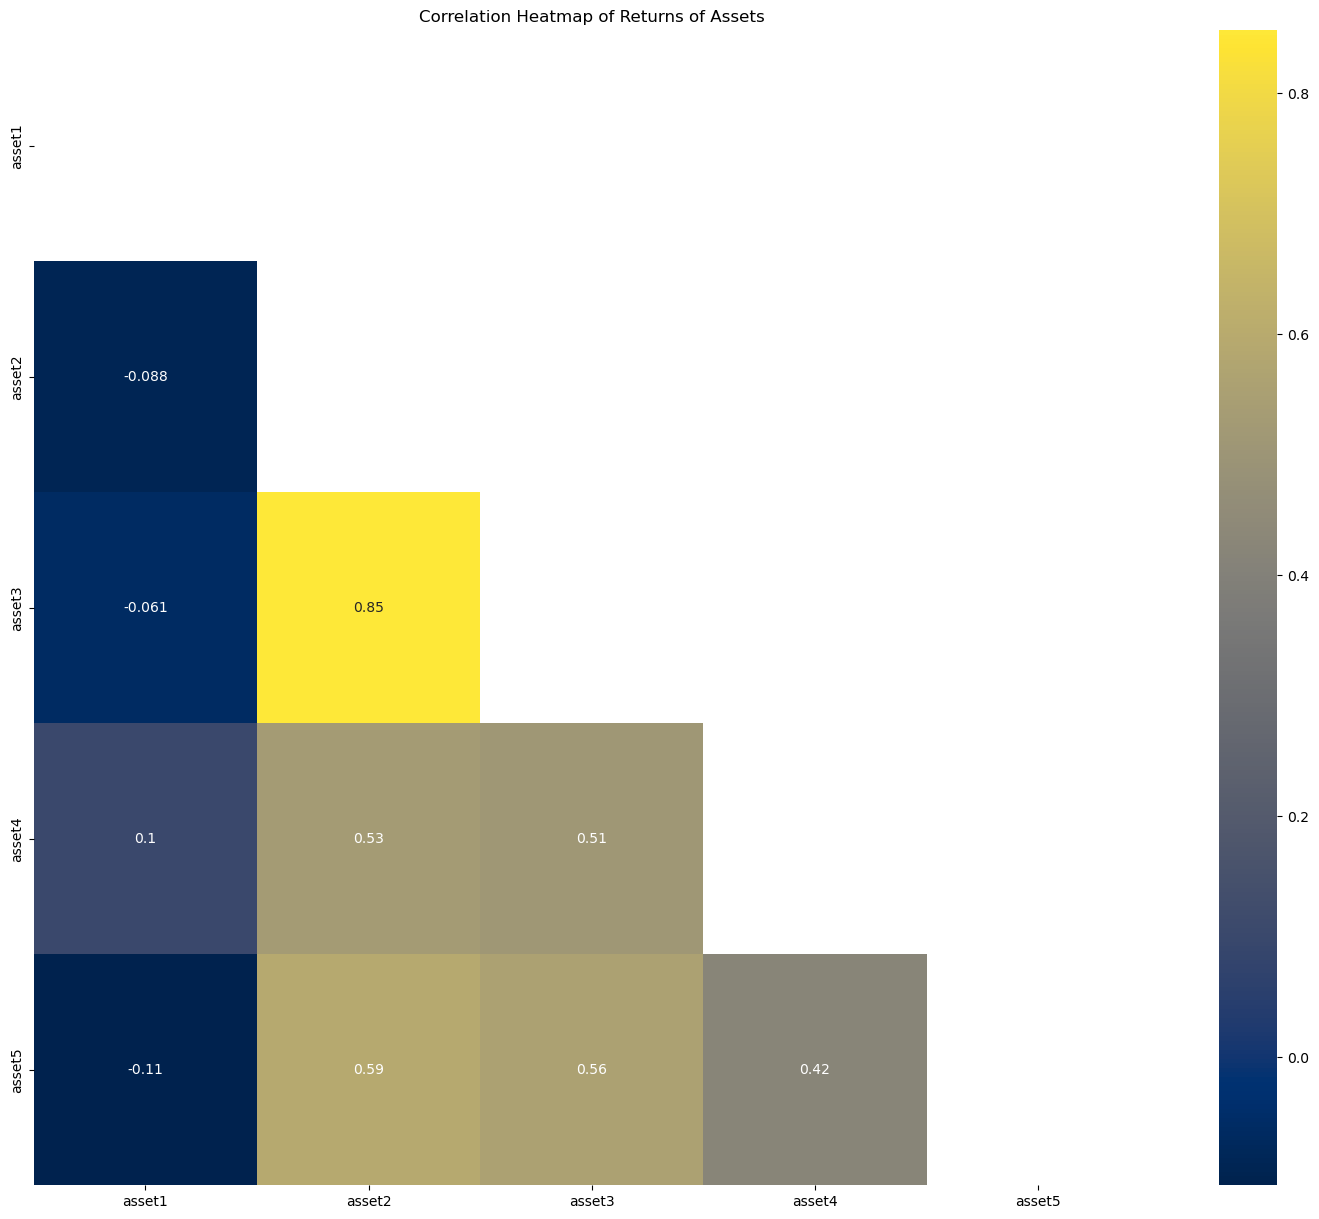

In [18]:
mask = np.zeros_like(returns.corr())
mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(returns.corr(), annot=True, cmap="cividis", mask=mask)

plt.title("Correlation Heatmap of Returns of Assets")
plt.show()

###  Interpretation of Correlation of Returns
The only strong correlation is between returns of asset2 and asset3, between the others the linear correlation is mild except for low on the return of asset1 with any other return.

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

I picked the returns with the highest linear correlation on the returns

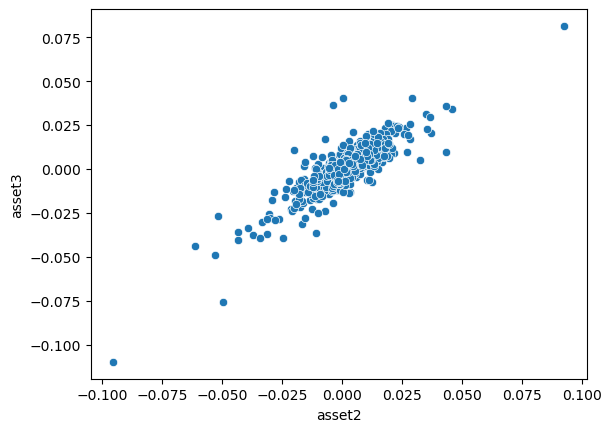

In [19]:
sns.scatterplot(data=returns, x='asset2', y='asset3')
plt.show()

### Interpretation of the relationship of two returns 
The relationship is both linear and monotonic. This is interesting as asset2 and asset3 do not belong to the same family.

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [20]:
data2 = pd.read_csv('portfolio_weights.csv') #loading the dataframe
dfw = data2.copy()
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [21]:
dfw.columns = [column.lower() for column in dfw.columns] #converting to lower case

In [22]:
dfw.isnull().sum() #no NAN values

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [23]:
dfw.duplicated().sum() #no duplications

0

In [24]:
dfw.eq(" ").sum() #no empty strings

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [25]:
dfw["date"] = pd.to_datetime(dfw.date) #converting to date to datetime
dfw = dfw.set_index('date') #making date the index
dfw.dtypes

asset1    float64
asset2    float64
asset3    float64
asset4    float64
asset5    float64
dtype: object

In [26]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset1  783 non-null    float64
 1   asset2  783 non-null    float64
 2   asset3  783 non-null    float64
 3   asset4  783 non-null    float64
 4   asset5  783 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB


In [27]:
dfw["sum_of_weights"] = dfw.sum(axis=1) #checking that the sum is always 1 for the weights per day
dfw.tail()

,asset1,asset2,asset3,asset4,asset5,sum_of_weights
date,,,,,,
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356,1.0
2021-12-31,0.071307,0.266093,0.168775,0.33547,0.158356,1.0


In [28]:
dfw.head()

,asset1,asset2,asset3,asset4,asset5,sum_of_weights
date,,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974,1.0
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974,1.0


In [29]:
dfw.sample(5)

,asset1,asset2,asset3,asset4,asset5,sum_of_weights
date,,,,,,
2020-08-18,0.321749,0.127529,0.123941,0.185697,0.241084,1.0
2020-03-27,0.321749,0.127529,0.123941,0.185697,0.241084,1.0
2019-03-15,0.225458,0.116255,0.265003,0.230310,0.162974,1.0
2019-02-07,0.225458,0.116255,0.265003,0.230310,0.162974,1.0
2021-12-20,0.071307,0.266093,0.168775,0.335470,0.158356,1.0


In [30]:
dfw=dfw.drop(columns="sum_of_weights") #dropping again the column to check weights were one

In [31]:
dfw

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356


#### Interpretation of EDA on asset weights

The date has been converted to datetime and made index. Furthermore, I did a sample check that the weight of all asset weights is 1 per row.

# Stack Plot of Asset Weights Over Time

Text(0, 0.5, 'Asset Value')

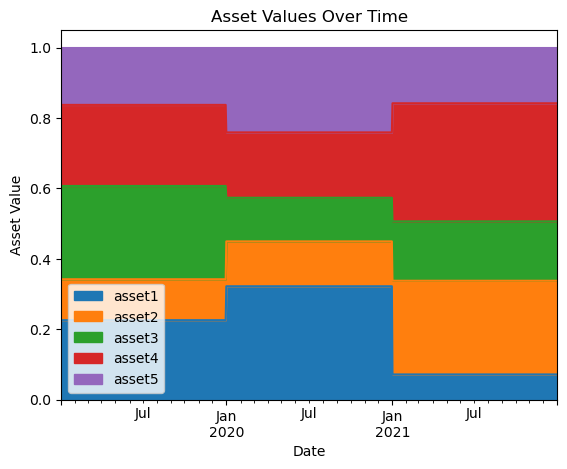

In [32]:
# Plotting the stacked area chart
dfw.plot.area()

# Adding labels and title
plt.title("Asset Values Over Time")
plt.xlabel("Date")
plt.ylabel("Asset Value")

#### Interpretation of Asset Weights over Time

It looks like asset weights were only re-evaluated and changed once a year - in January 2020 and in January 2021 but otherwise remained stable.

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [33]:
returns.head()

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192


In [34]:
dfw.head()

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [35]:
returns.shape

(783, 5)

In [36]:
dfw.shape

(783, 5)

In [37]:
df_new = (dfw * returns).sum(axis=1) # multiply assets with returns and sum the row
cum_prod = (1+df_new).cumprod() # function for cumulative return as returns get re-invested as well

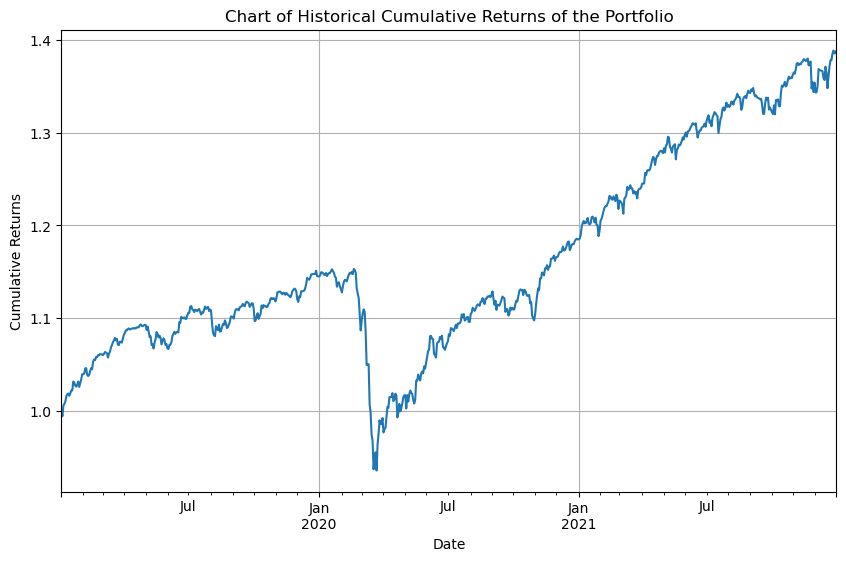

In [38]:
plt.figure(figsize=(10, 6))
cum_prod.plot()
plt.title('Chart of Historical Cumulative Returns of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)



#### Interpretation of Cumulative Returns

The investment gained each day is re-invested. Overall the portfolio investment has been steadily growing over the three years despite a dip during covid in spring 2020

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

Example calculation found here: https://www.indeed.com/career-advice/career-development/how-to-calculate-annualized-return

In [39]:
# Determine the beginning and ending values (It is also possible to view in the graph  the start and end)
beginning_value = cum_prod.iloc[0]
ending_value = cum_prod.iloc[-1]

# Calculate the total number of years (assuming 252 trading days in a year)
total_years = len(cum_prod) / 252

# Calculate the annualized return (CAGR/Compound Annual Growth Rate)
annualized_return = (ending_value / beginning_value) ** (1 / total_years) - 1

# Display the annualized return
print(f"Annualized Return: {annualized_return*100:.2f} %")

Annualized Return: 11.07 %


#### Interpretation of Annulized Return

Annualized return - also referred to as the "compound annual growth rate" (CAGR) - is a measure of how much an investment grows or shrinks, on average, each year over a specified time period. It's a useful metric for comparing the performance of different investments or evaluating the potential growth of an investment over time.

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [40]:
# Calculate the standard deviation of daily returns
daily_volatility = df_new.std()

# Annualize the volatility (assuming 252 trading days in a year)
annualized_volatility = daily_volatility * np.sqrt(252)

# Display the annualized volatility
print(f"Annualized Volatility: {annualized_volatility*100:.2f} %")

Annualized Volatility: 8.36 %


#### Interpretation of Annual Volatility

Volatility does not provide direction, it only indicates how high price changes range. It can be used for benchmarking or for assesing how high risk investment this portfolio is. Different clients might be comfortable with different levels of risks.

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [41]:
data3 = pd.read_csv('asset_information_data.csv')
dfi = data3.copy()
dfi.columns = [column.lower() for column in dfi.columns] #converting to lower case
dfi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   family  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [42]:
dfi.head()

,name,family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [43]:
dfi["name"] = dfi["name"].apply(str.lower) #the values need to be lower case
dfi.head()

,name,family
0,asset1,Fixed Income
1,asset2,Fixed Income
2,asset3,Equity
3,asset4,Equity
4,asset5,Alternative


In [44]:
# Map assets to their respective families
family_mapping = dfi.set_index('name')['family']
family_mapping


name
asset1    Fixed Income
asset2    Fixed Income
asset3          Equity
asset4          Equity
asset5     Alternative
Name: family, dtype: object

In [45]:
# Create a DataFrame for family weights
families_df = dfw.groupby(family_mapping, axis=1).sum()
families_df

family,Alternative,Equity,Fixed Income
date,,,
2019-01-02,0.162974,0.495313,0.341713
2019-01-03,0.162974,0.495313,0.341713
2019-01-04,0.162974,0.495313,0.341713
2019-01-07,0.162974,0.495313,0.341713
2019-01-08,0.162974,0.495313,0.341713
...,...,...,...
2021-12-27,0.158356,0.504245,0.337400
2021-12-28,0.158356,0.504245,0.337400
2021-12-29,0.158356,0.504245,0.337400


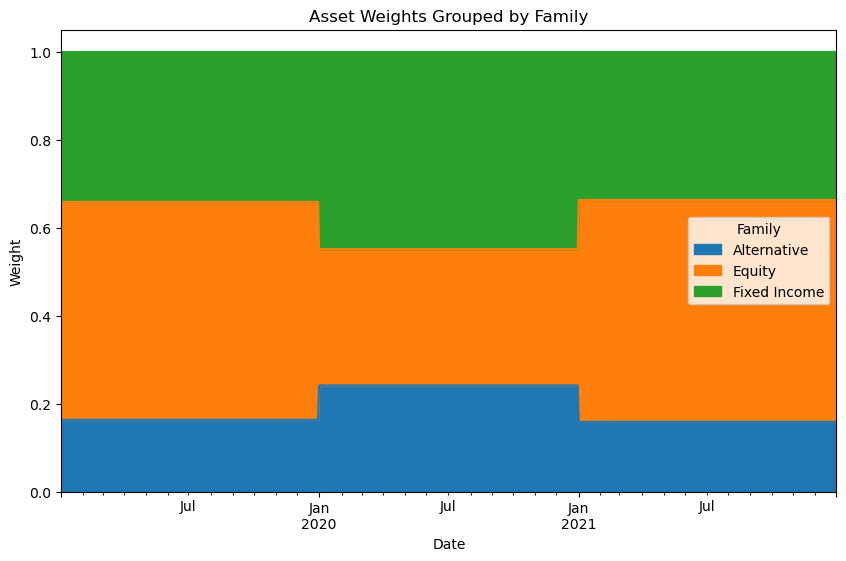

In [46]:
# Plot
families_df.plot.area(figsize=(10, 6))
plt.title('Asset Weights Grouped by Family')
plt.ylabel('Weight')
plt.xlabel('Date')
plt.legend(title='Family')
plt.show()

#### Interpretation of Asset Weights per Family 

Assets weight was more or less equally distributed around the amount of assets per family. Each asset had a weight floating around 20%.